## Convolutional Neural Network (CNN)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # themes,colors interface
import matplotlib.pyplot as plt # visualization
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')


In [2]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_train = train["label"]
x_train = train.drop(labels = ["label"],axis = 1)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

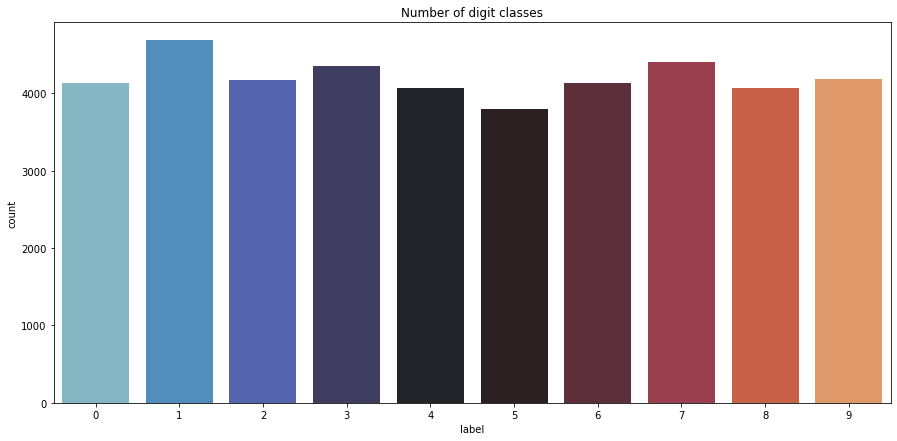

In [5]:
plt.figure(figsize=(15,7))
g = sns.countplot(y_train,palette = "icefire")
plt.title("Number of digit classes")
y_train.value_counts()

## Normalization, Reshape and Label Encoding 

In [6]:
x_train = x_train / 255.0
test = test / 255.0
print("x_train shape :",x_train.shape)
print("test shape :",test.shape)

x_train shape : (42000, 784)
test shape : (28000, 784)


In [7]:
x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape :",x_train.shape)
print("test shape :",test.shape)

x_train shape : (42000, 28, 28, 1)
test shape : (28000, 28, 28, 1)


In [8]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train,num_classes = 10)

## Train - Test Split

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.1,random_state = 2)
print("x_train shape",x_train.shape)
print("x_test shape",x_val.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


## Implementing with Keras

In [10]:
# 
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizer_v2.adam import Adam
from keras.optimizer_v2.rmsprop import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [11]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [12]:
# Compile
model.compile(optimizer = optimizer,loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [13]:
# Batch and Epoch 
epochs = 10
batch_size = 250

In [14]:
# Data Augmentation
datagen = ImageDataGenerator(
        featurewise_center = False,
        samplewise_center =False,
        featurewise_std_normalization = False,
        samplewise_std_normalization = False,
        zca_whitening = False,
        rotation_range = 0.25,
        zoom_range = 0.25,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        horizontal_flip = False,
        vertical_flip = False)

datagen.fit(x_train)

In [15]:
# Fitting the Model
history = model.fit_generator(datagen.flow(x_train,y_train,batch_size = batch_size),
                             epochs = epochs , validation_data = (x_val,y_val),
                             steps_per_epoch = x_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 19s 120ms/step - loss: 1.2677 - accuracy: 0.5738 - val_loss: 0.2531 - val_accuracy: 0.9343
Epoch 2/10
151/151 [==============================] - 18s 121ms/step - loss: 0.5393 - accuracy: 0.8269 - val_loss: 0.1502 - val_accuracy: 0.9610
Epoch 3/10
151/151 [==============================] - 19s 124ms/step - loss: 0.3910 - accuracy: 0.8777 - val_loss: 0.1196 - val_accuracy: 0.9681
Epoch 4/10
151/151 [==============================] - 19s 124ms/step - loss: 0.3278 - accuracy: 0.8970 - val_loss: 0.0985 - val_accuracy: 0.9714
Epoch 5/10
151/151 [==============================] - 23s 155ms/step - loss: 0.2870 - accuracy: 0.9107 - val_loss: 0.0786 - val_accuracy: 0.9781
Epoch 6/10
151/151 [==============================] - 29s 189ms/step - loss: 0.2646 - accuracy: 0.9196 - val_loss: 0.0744 - val_accuracy: 0.9786
Epoch 7/10
151/151 [==============================] - 31s 207ms/step - loss: 0.2418 - accuracy: 0.9251 - val_loss: 0.0692 - val_ac

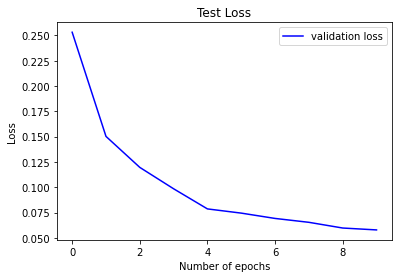

In [16]:
# Evaluate the Model

plt.plot(history.history['val_loss'],color = 'b', label = 'validation loss')
plt.title('Test Loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

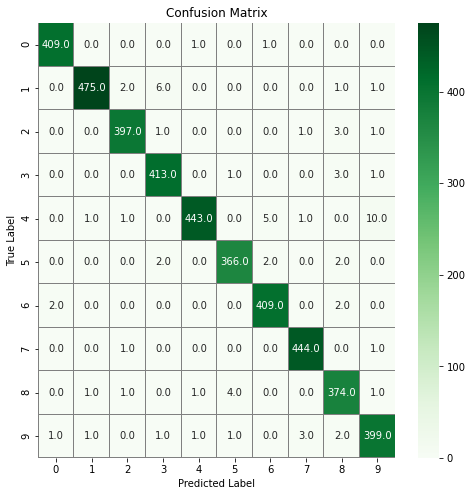

In [17]:
import seaborn as sns
y_pred = model.predict(x_val) # predict the values from the validation dataset
y_pred_classes = np.argmax(y_pred,axis = 1) # prediction classes to one hot vectors (x_val to one-hot)
y_true = np.argmax(y_val,axis = 1) # validation observations to one hot vectors  (y_val to one-hot)
confusion_mtx = confusion_matrix(y_true,y_pred_classes) # compute the confusion matrix
f,ax = plt.subplots(figsize = (8,8)) # plot the confusion matrix
sns.heatmap(confusion_mtx, annot=True,linewidths=0.01,cmap="Greens",linecolor="gray",fmt= '.1f',ax=ax) # annot = showing the nums
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()